In [20]:
import warnings
warnings.filterwarnings('ignore')

import iris
import iris.plot as iplt
import iris.quickplot as qplt
from iris.experimental.equalise_cubes import equalise_attributes

import matplotlib.pyplot as plt

import glob
import numpy

In [14]:
%matplotlib inline

# Full field trends (i.e. lat, lon, depth)

In [4]:
ccsm_ghg_dedrifted_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historicalGHG/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_CCSM4_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'
ccsm_ghg_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historicalGHG/yr/ocean/r1i1p1/thetao/latest/thetao_Oyr_CCSM4_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'
canesm_ghg_dedrifted_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CanESM2/historicalGHG/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_CanESM2_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'
canesm_ghg_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CanESM2/historicalGHG/yr/ocean/r1i1p1/thetao/latest/thetao_Oyr_CanESM2_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'

In [5]:
def plot_lon_slice(infile, model, experiment, dedrifted=False):
    """Plot depth vs latitude for a given longitude"""
    
    cube = iris.load_cube(infile, 'sea_water_potential_temperature')

    plt.figure(figsize=(10, 10))
    
    plt.subplot(221)
    qplt.pcolormesh(cube.extract(iris.Constraint(longitude=2)), cmap='RdBu_r', vmax=0.025, vmin=-0.025)
    plt.title('2E')
    
    plt.subplot(222)
    qplt.pcolormesh(cube.extract(iris.Constraint(longitude=62)), cmap='RdBu_r', vmax=0.025, vmin=-0.025)
    plt.title('62E')
    
    plt.subplot(223)
    qplt.pcolormesh(cube.extract(iris.Constraint(longitude=122)), cmap='RdBu_r', vmax=0.025, vmin=-0.025)
    plt.title('122E')
    
    plt.subplot(224)
    qplt.pcolormesh(cube.extract(iris.Constraint(longitude=302)), cmap='RdBu_r', vmax=0.025, vmin=-0.025)
    plt.title('302E')
    
    title = 'temperature trend, 1950-2005 (%s, %s)' %(model, experiment)
    if dedrifted:
        title = 'dedrifted ' + title
        
    plt.suptitle(title)
    
    plt.show()

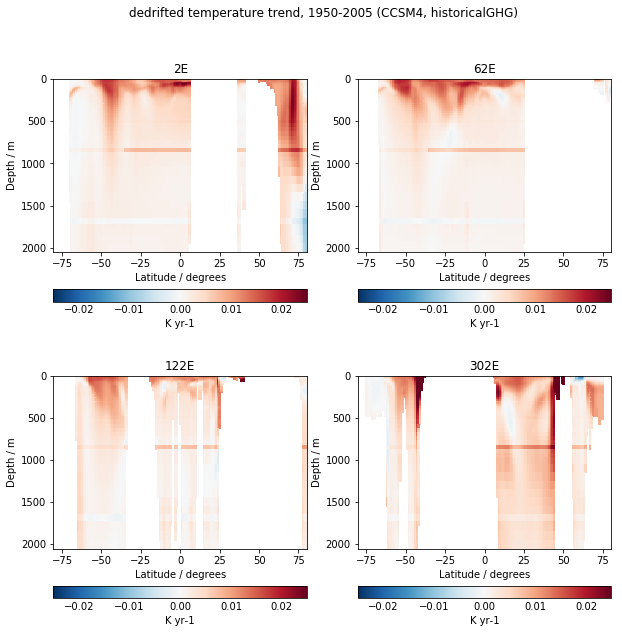

In [6]:
plot_lon_slice(ccsm_ghg_dedrifted_file, 'CCSM4', 'historicalGHG', dedrifted=True)

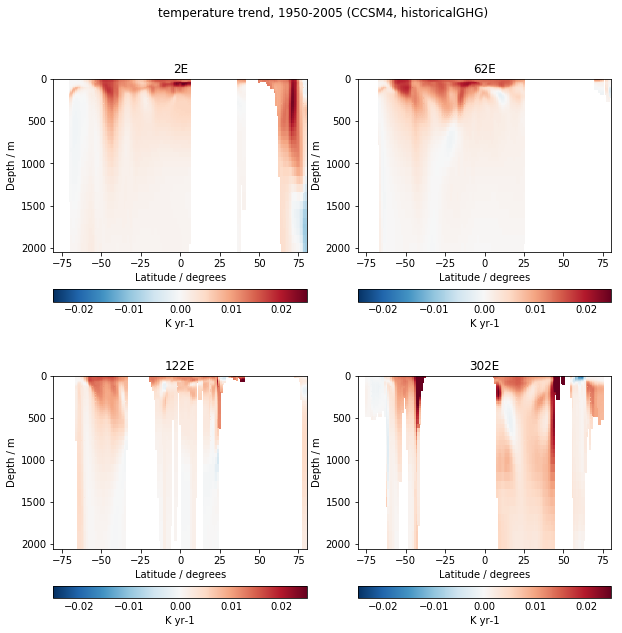

In [7]:
plot_lon_slice(ccsm_ghg_file, 'CCSM4', 'historicalGHG')

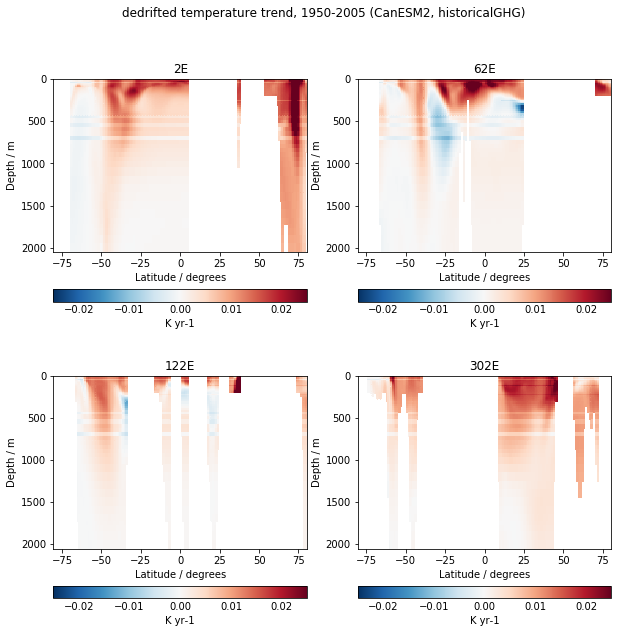

In [8]:
plot_lon_slice(canesm_ghg_dedrifted_file, 'CanESM2', 'historicalGHG', dedrifted=True)

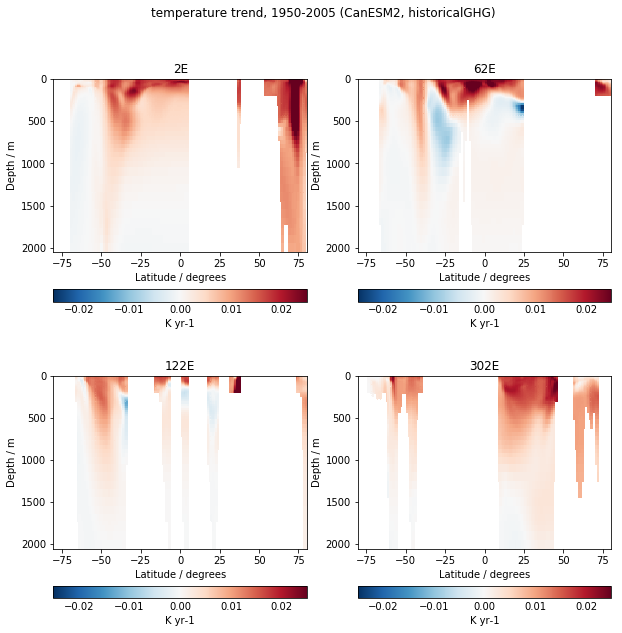

In [9]:
plot_lon_slice(canesm_ghg_file, 'CanESM2', 'historicalGHG')

# Zonal mean trends

In [13]:
ccsm_zonal_mean_ghg_dedrifted_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historicalGHG/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao-zonal-mean_Oyr_CCSM4_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'
ccsm_zonal_mean_ghg_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historicalGHG/yr/ocean/r1i1p1/thetao/latest/thetao-zonal-mean_Oyr_CCSM4_historicalGHG_r1i1p1_1950-2005-trend_susan-grid.nc'

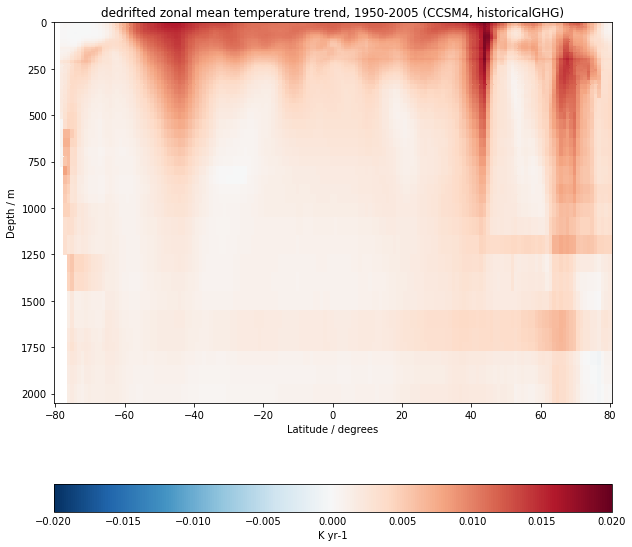

In [15]:
cube = iris.load_cube(ccsm_zonal_mean_ghg_dedrifted_file, 'sea_water_potential_temperature')
plt.figure(figsize=(10, 10))
qplt.pcolormesh(cube, cmap='RdBu_r', vmax=0.02, vmin=-0.02)
plt.title('dedrifted zonal mean temperature trend, 1950-2005 (CCSM4, historicalGHG)')
plt.show()

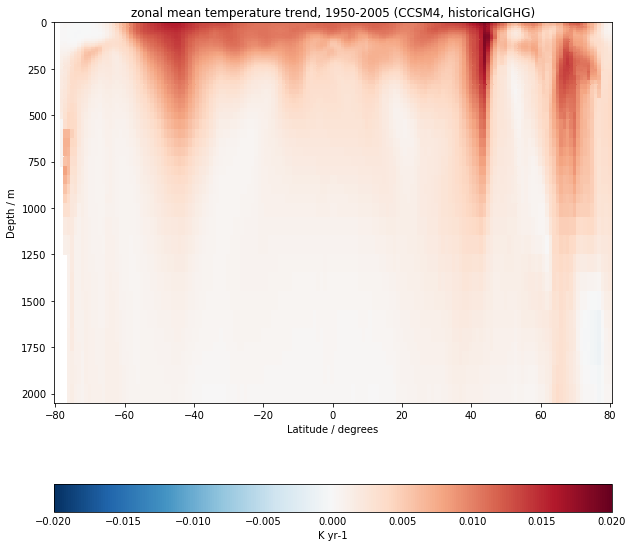

In [16]:
cube = iris.load_cube(ccsm_zonal_mean_ghg_file, 'sea_water_potential_temperature')
plt.figure(figsize=(10, 10))
qplt.pcolormesh(cube, cmap='RdBu_r', vmax=0.02, vmin=-0.02)
plt.title('zonal mean temperature trend, 1950-2005 (CCSM4, historicalGHG)')
plt.show()

# Check cubic polynomial fit

In [23]:
control_files = glob.glob('/g/data/r87/dbi599/DRSv2/CMIP5/CanESM2/piControl/yr/ocean/r1i1p1/thetao/latest/thetao_Oyr_CanESM2_piControl_r1i1p1_*_susan-grid.nc')
coefficient_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CanESM2/piControl/yr/ocean/r1i1p1/thetao/latest/thetao-coefficients_Oyr_CanESM2_piControl_r1i1p1_all_susan-grid.nc'

In [82]:
def plot_control(control_files, coefficient_file, depth, lat=-50, lon=62, ylim=None):
    """Plot the control data and cubic fit"""
    
    lon_constraint = iris.Constraint(longitude=lon)
    lat_constraint = iris.Constraint(latitude=lat)
    depth_constraint = iris.Constraint(depth=depth)
    
    cube_list = iris.load(control_files, 'sea_water_potential_temperature')
    iris.util.unify_time_units(cube_list)
    equalise_attributes(cube_list)
    cube = cube_list.concatenate_cube()
    cube = cube.extract(lon_constraint & lat_constraint & depth_constraint)
    
    coefficient_a_cube = iris.load_cube(coefficient_file, 'coefficient a' & lon_constraint & lat_constraint & depth_constraint)
    coefficient_b_cube = iris.load_cube(coefficient_file, 'coefficient b' & lon_constraint & lat_constraint & depth_constraint)
    coefficient_c_cube = iris.load_cube(coefficient_file, 'coefficient c' & lon_constraint & lat_constraint & depth_constraint)
    coefficient_d_cube = iris.load_cube(coefficient_file, 'coefficient d' & lon_constraint & lat_constraint & depth_constraint)
    
    x_data = cube.coord('time').points
    aval = float(coefficient_a_cube.data)
    bval = float(coefficient_b_cube.data)
    cval = float(coefficient_c_cube.data)
    dval = float(coefficient_d_cube.data)
    poly = aval + bval * x_data + cval * x_data**2 + dval * x_data**3
    
    fig = plt.figure(figsize=[18, 7])
    ntimes = test.shape[0]
    xvals = numpy.arange(ntimes)
    plt.plot(xvals, cube.data)
    plt.plot(xvals, poly)
    plt.ylabel('temperature (K)')
    plt.xlabel('year')
    
    if ylim:
        plt.ylim(ylim)
    
    plt.show()

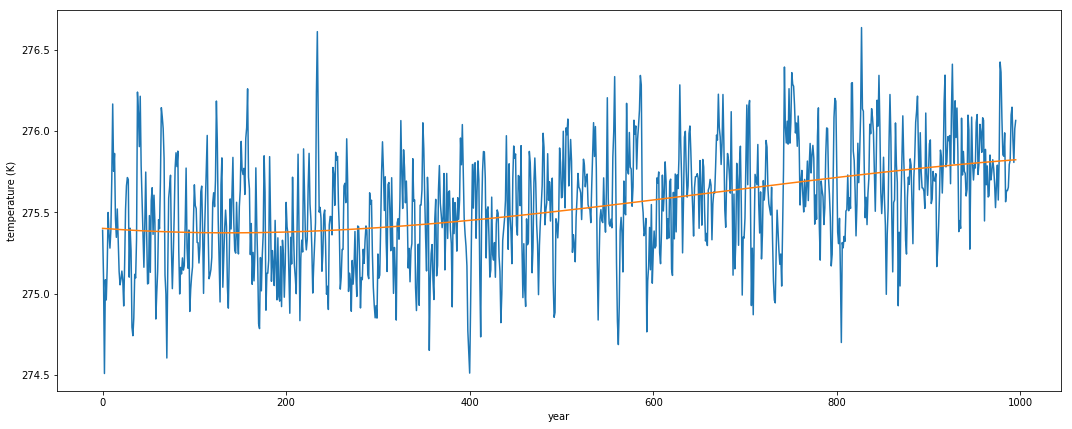

In [83]:
plot_control(control_files, coefficient_file, 0)

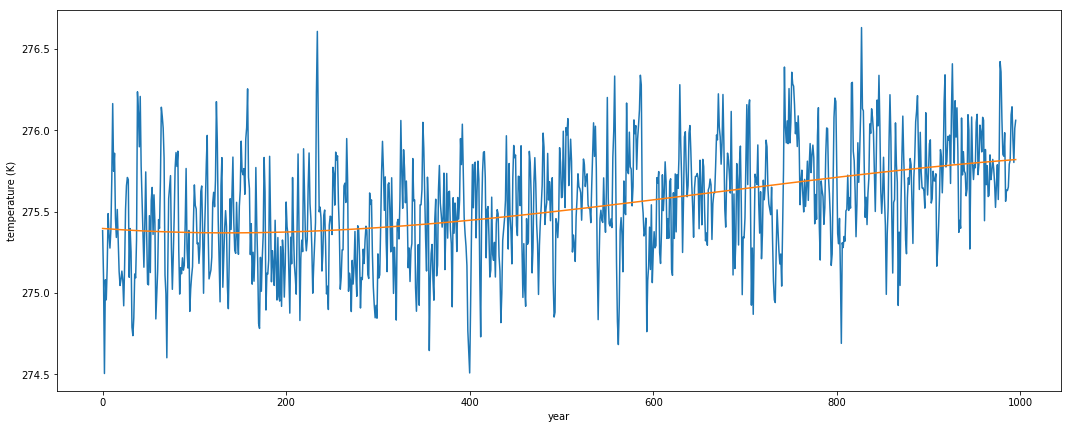

In [84]:
plot_control(control_files, coefficient_file, 10)

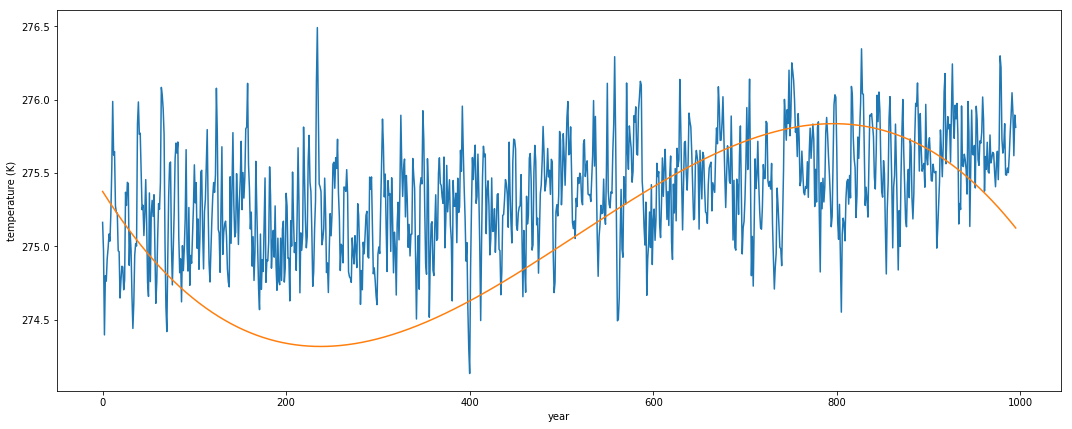

In [85]:
plot_control(control_files, coefficient_file, 50)

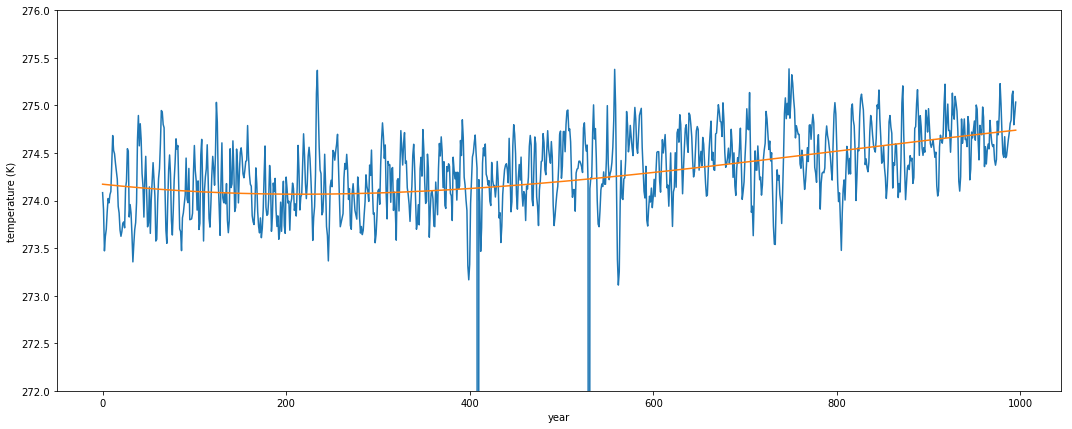

In [88]:
plot_control(control_files, coefficient_file, 100, ylim=[272, 276])

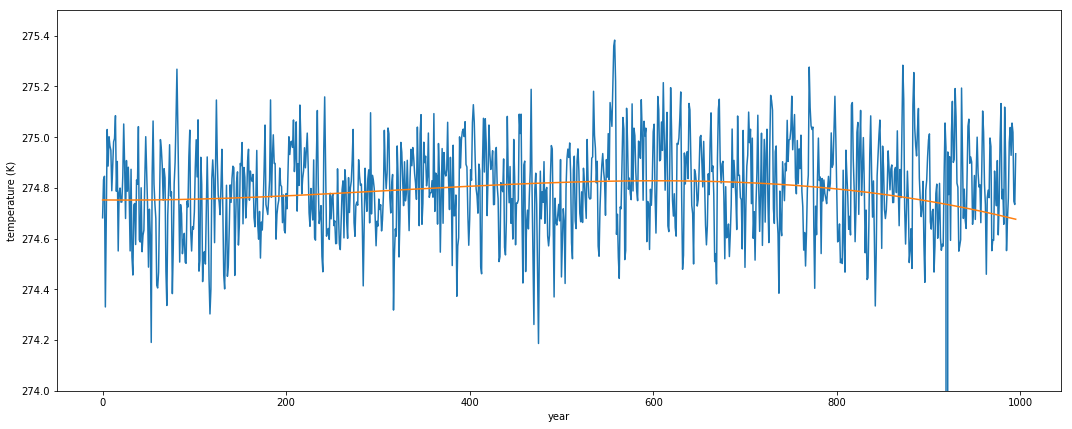

In [90]:
plot_control(control_files, coefficient_file, 200, ylim=[274, 275.5])

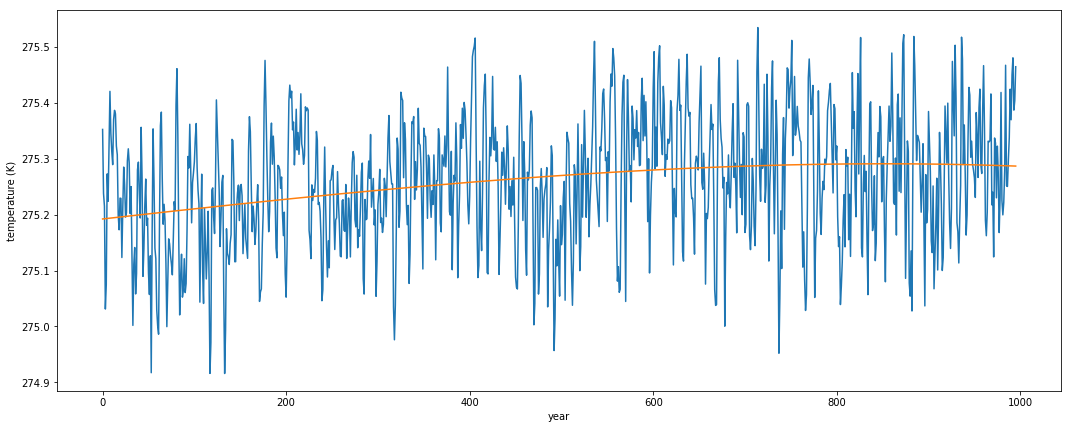

In [91]:
plot_control(control_files, coefficient_file, 300)

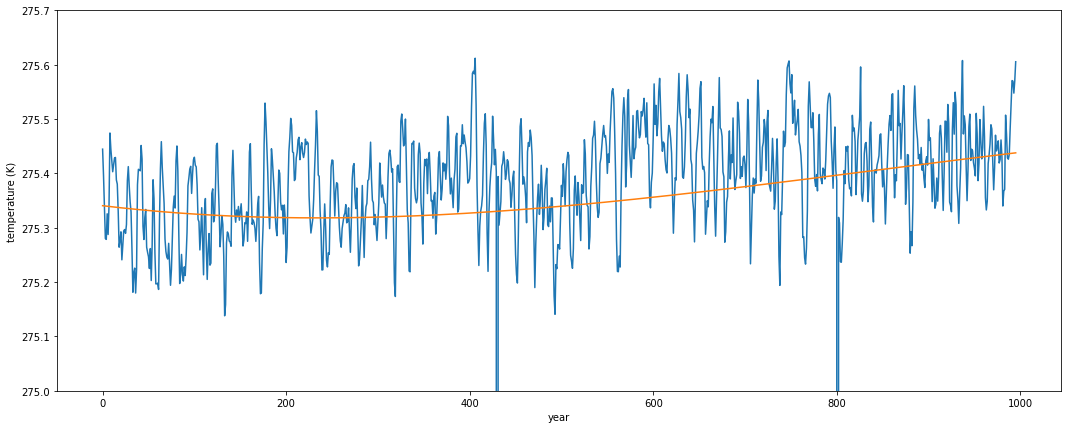

In [93]:
plot_control(control_files, coefficient_file, 400, ylim=[275, 275.7])

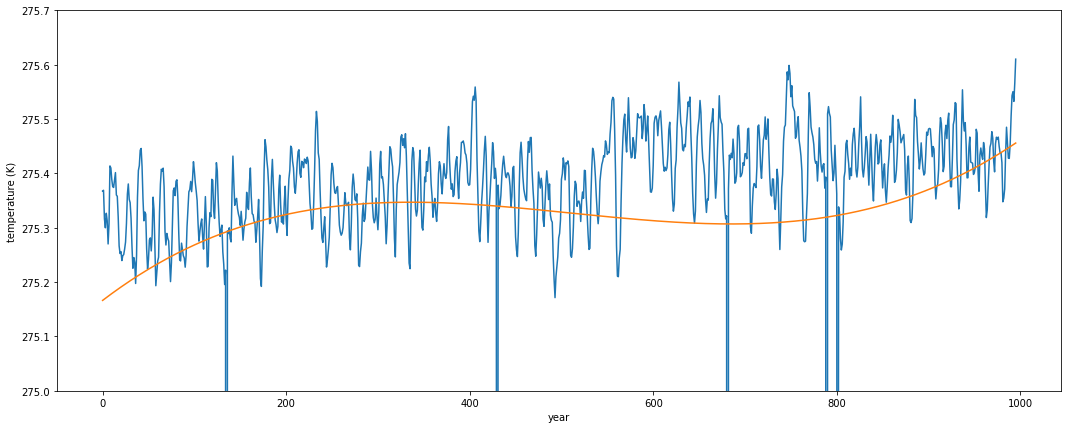

In [94]:
plot_control(control_files, coefficient_file, 500, ylim=[275, 275.7])

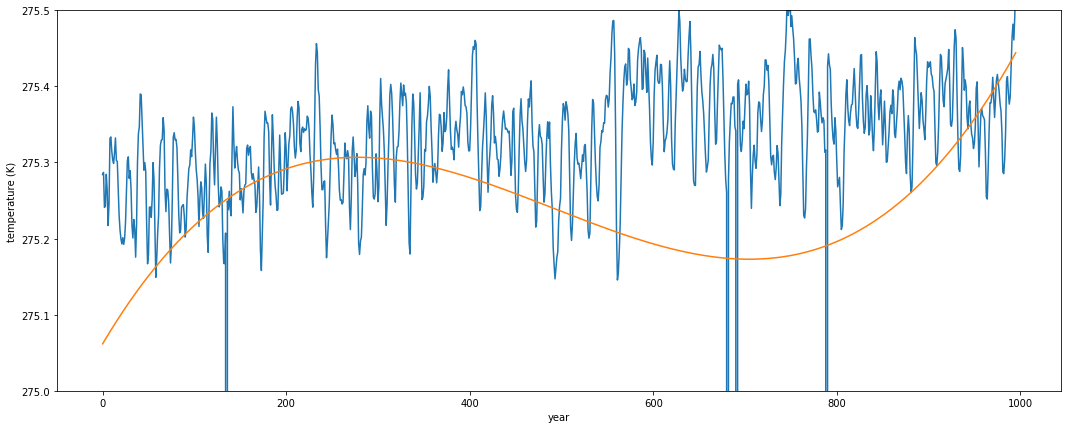

In [96]:
plot_control(control_files, coefficient_file, 600, ylim=[275, 275.5])

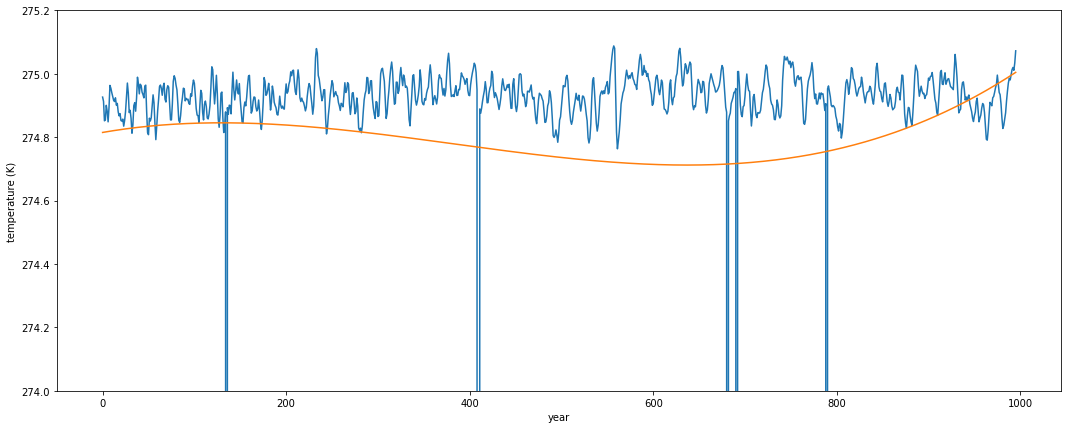

In [99]:
plot_control(control_files, coefficient_file, 1000, ylim=[274, 275.2])